In [1]:
import tensorflow as tf

In [2]:
import pandas as pd


In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/usedcars.csv')

In [28]:
df_enum = pd.get_dummies(df)
df_enum

,year,price,mileage,model_SE,model_SEL,model_SES,color_Black,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_AUTO,transmission_MANUAL
0,2011,21992,7413,False,True,False,False,False,False,False,False,False,False,False,True,True,False
1,2011,20995,10926,False,True,False,False,False,False,True,False,False,False,False,False,True,False
2,2011,19995,7351,False,True,False,False,False,False,False,False,False,True,False,False,True,False
3,2011,17809,11613,False,True,False,False,False,False,True,False,False,False,False,False,True,False
4,2012,17500,8367,True,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2006,6200,95000,False,False,True,False,False,False,False,False,False,True,False,False,True,False
146,2002,5995,87003,True,False,False,False,False,False,False,False,True,False,False,False,True,False
147,2000,5980,96841,True,False,False,False,False,False,False,False,True,False,False,False,True,False
148,2001,4899,151479,True,False,False,False,False,False,False,False,False,False,False,True,True,False


In [29]:
dados = df_enum.drop(columns=['price'])
alvo = df_enum['price']

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
dados = scaler.fit_transform(dados)
dados

array([[ 0.83333333, -0.96526887, -1.        , ...,  1.        ,
         1.        , -1.        ],
       [ 0.83333333, -0.91734647, -1.        , ..., -1.        ,
         1.        , -1.        ],
       [ 0.83333333, -0.96611464, -1.        , ..., -1.        ,
         1.        , -1.        ],
       ...,
       [-1.        ,  0.25465855,  1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.83333333,  1.        ,  1.        , ...,  1.        ,
         1.        , -1.        ],
       [-1.        ,  0.42405806,  1.        , ..., -1.        ,
         1.        , -1.        ]])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dados, alvo, test_size=0.10, random_state=42)

In [57]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  tf.keras.layers.Dense(16),
  tf.keras.layers.Dense(1)
])

In [58]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.R2Score()])

In [63]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5454406.0000 - r2_score: 0.4470 
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5668575.0000 - r2_score: 0.4748 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5105777.0000 - r2_score: 0.4898 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6207146.0000 - r2_score: 0.4879 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5028253.5000 - r2_score: 0.4875 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4514127.5000 - r2_score: 0.4956 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4864973.0000 - r2_score: 0.4892 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4377504.5000 - r2_score: 0.4876 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5442006.5000 - r2_score: 0.5215 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5553577.0000 - r2_score: 0.5024 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4769240.0000 - r2_score: 0.5052 
Epoch 12

In [64]:
#Exemplo de como verificar valores faltando
# df_enum.isnull()
# df_enum.isnull().sum()
# df_enum.isnull().sum().sort_values
#df_enum.isnull().sum().sum()

In [65]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3007271.5000 - r2_score: 0.5217


[3007271.5, 0.5217086672782898]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


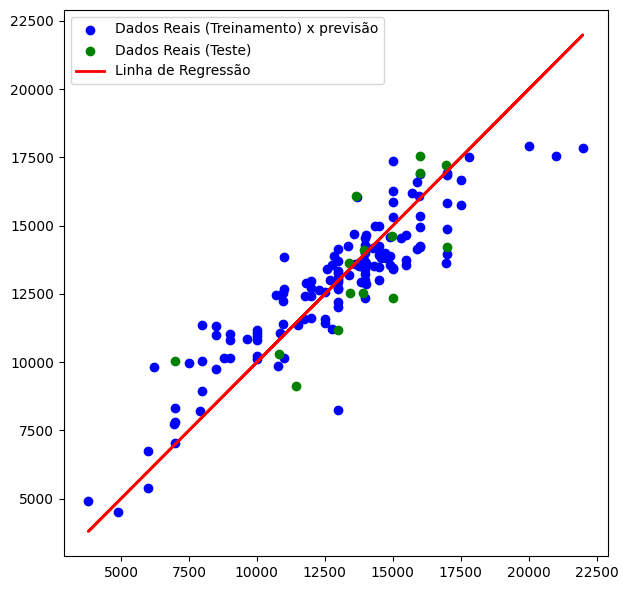

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', label='Dados Reais (Treinamento) x previsão')
plt.scatter(y_test, y_pred_test, color='green', label='Dados Reais (Teste)')
plt.plot(y_train, y_train, color='red', linewidth=2, label='Linha de Regressão')
plt.legend()

plt.tight_layout()
plt.show()